<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E6%B3%95%E5%8B%99%E9%83%A8%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92/%E7%B0%A1%E5%96%AE%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8/cost_function1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9079e55a33a1f8421bb66aaaf2d89e28e53114a33ae79e97bf56754774b2d615
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [3]:
import wget

#下載Salary_Data.csv
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/Salary_Data.csv")

#下載
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont.ttf'

In [4]:
import pandas as pd
url = "Salary_Data.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
x_series = df['YearsExperience']
y_series = df['Salary']

### cost的計算是使用(真實值-預測值)^2

In [6]:
w = 10
b = 0
y_pred = w * x_series + b

cost = (y_series - y_pred) ** 2
print(cost)
print("=======")
print(cost.sum() / len(y_series))

0     1102.24
1      936.36
2     1211.04
3      800.89
4     1102.24
5      515.29
6      552.25
7      316.84
8      761.76
9      906.01
10     501.76
11    1049.76
12     404.01
13     585.64
14     246.49
15     285.61
16     256.00
17     259.21
18     357.21
19     225.00
20     900.00
21     497.29
22    1149.21
23     561.69
24     739.84
25     497.29
26    1011.24
27     501.76
28     240.25
29     479.61
30     275.56
31     372.49
32     282.24
dtype: float64
602.547878787879


### 建立function,專門計算cost的值

In [8]:
def compute_cost(x, y, w, b):
    y_pred = w * x + b
    cost = (y - y_pred)**2
    cost = cost.sum() /len(x)
    return cost

In [10]:
compute_cost(x_series, y_series, 10, b)

602.547878787879

In [11]:
# b=0 w=-100~100 cost會是多少
costs = []
for w in range(-100, 101):
    cost = compute_cost(x_series, y_series, w, 0)
    costs.append(cost)
costs

[420951.08121212124,
 413557.2063636363,
 406228.88242424245,
 398966.1093939394,
 391768.8872727272,
 384637.21606060606,
 377571.0957575757,
 370570.52636363637,
 363635.5078787879,
 356766.0403030302,
 349962.12363636366,
 343223.7578787879,
 336550.94303030305,
 329943.6790909091,
 323401.966060606,
 316925.8039393939,
 310515.19272727263,
 304170.13242424245,
 297890.623030303,
 291676.6645454545,
 285528.25696969696,
 279445.40030303027,
 273428.0945454546,
 267476.33969696966,
 261590.1357575757,
 255769.48272727273,
 250014.38060606056,
 244324.82939393938,
 238700.82909090907,
 233142.3796969697,
 227649.4812121212,
 222222.13363636364,
 216860.33696969692,
 211564.0912121212,
 206333.39636363636,
 201168.25242424244,
 196068.6593939394,
 191034.61727272722,
 186066.12606060607,
 181163.18575757576,
 176325.79636363636,
 171553.95787878786,
 166847.67030303032,
 162206.93363636362,
 157631.7478787879,
 153122.113030303,
 148678.02909090905,
 144299.49606060603,
 139986.5139393

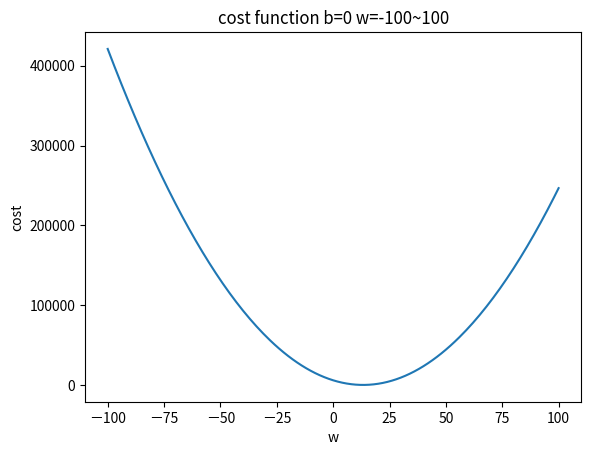

In [12]:
import matplotlib.pylab as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

#plt.scatter(range(-100, 101), costs)
plt.plot(range(-100, 101), costs)
plt.title("cost function b=0 w=-100~100")
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

In [13]:
# w=-100~100 b=-100~100的cost

import numpy as np
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))
i=0
for w in ws:
    j=0
    for b in bs:
        cost = compute_cost(x_series, y_series, w, b)
        costs[i, j] = cost
        j += 1
    i += 1



In [ ]:
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]],
      shape=(201, 201))

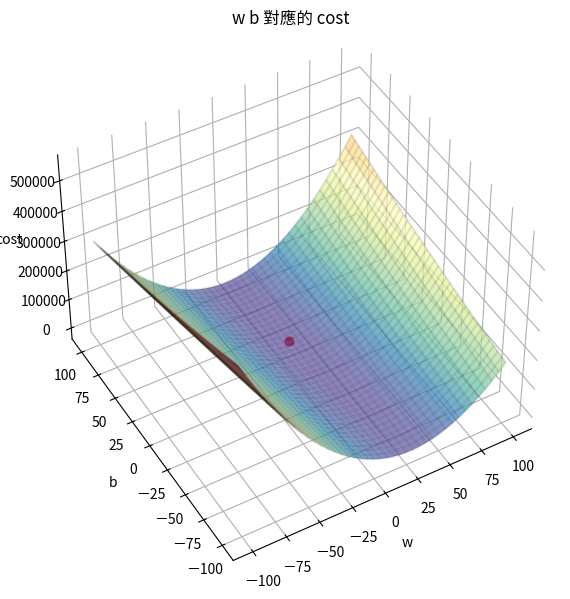

當w=[9], b=[29] 會有最小cost:[32.69484848]


In [14]:
plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.view_init(45,-120)
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))

# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(w_grid, b_grid, costs, cmap='Spectral_r', alpha=0.7)
ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.1)
ax.set_title('w b 對應的 cost')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')
w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color='red', s=40)
plt.show()
print(f'當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}')

## 如何最有效的找出最佳的 w 和 b 呢?

## gradient descent 梯度下降
